## Distanța filogenetică

Vom folosi modelul pentru mutațiile ADN-ului ca să estimăm numărul total de mutații pornind de la mutațiile observate între strămoș și urmaș. Să luăm, spre exmemplu, modelul Jukes-Cantor dat de matricea $$
M(\alpha)=\left(\begin{array}{cccc} 1-\alpha & \frac{\alpha}{3} & \frac{\alpha}{3} & \frac{\alpha}{3} \\
\frac{\alpha}{3} & 1-\alpha & \frac{\alpha}{3} & \frac{\alpha}{3} \\
\frac{\alpha}{3} & \frac{\alpha}{3} & 1-\alpha & \frac{\alpha}{3} \\
\frac{\alpha}{3} & \frac{\alpha}{3} & \frac{\alpha}{3} & 1-\alpha 
\end{array}\right).
$$
Am calculat puterile $M(\alpha)^t$ și am obținut pe diagonală $\frac{1}{4}+\frac{3}{4}\left(1-\frac{4}{3}\alpha\right)^t$. Acestea măsoară probabilitățile condiționate ca bazele la momentul $t$ să coincidă cu cele de la momentul $0$. Deci fracția de site-uri avînd aceeași bază ca la început este $q(t)=\frac{1}{4}+\frac{3}{4}\left(1-\frac{4}{3}\alpha\right)^t$ și prin urmare fracția celor ale căror baze s-au schimbat este 
$p(t)=1-q(t)=\frac{3}{4}-\frac{3}{4}\left(1-\frac{4}{3}\alpha\right)^t.$ Același rezultat se obține și dacă însumăm cele trei intrări de pe coloane în afară de diagonală. Mai jos avem graficul lui $p$. Se observă că probabilitatea să obținem baze diferite crește asimptotic către $\frac{3}{4}$ și de asemenea pentru orice $p$ între $0$ și $\frac{3}{4}$ există un $t$ cu $p(t)=p$. Deci dacă știm $\alpha$ și estimăm $p$ putem calcula numărul de pași pentru a atinge $p$. 

În practică $p$ este relativ ușor de estimat, dar $t$ și $\alpha$ nu sînt cunoscuți. Vom vedea cum putem să determinăm aceste mărimi.

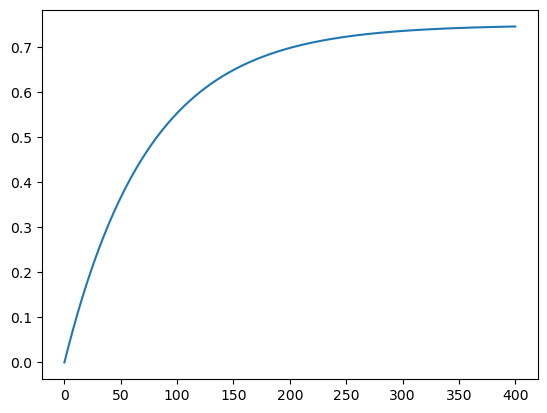

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f79a84f7550>

In [18]:
using PyPlot
α=0.01
p(t)=3/4-3/4*(1-4/3*α)^t
ts=0:400
ys=[p(t) for t in ts]
plot(ys)

Să presupunem că avem un șir da ADN inițial și o versiune mutată după un anumit timp. Presupunem că se aplică modelul Jukes-Cantor, dar nu știm nici rata de mutație, nici timpul $t$. Estimă $p$ numărînd site-urile care au baze diferite la început și la sfîrșit. Este evident că estimarea lui $p$ este cu atît mai precisă cu cît șirul este mai lung. Avem că $$p=\frac{3}{4}-\frac{3}{4}\left(1-\frac{4}{3}\alpha\right)^t.$$ Deci 
$$ t = \frac{ln\left(1-\frac{4}{3}p\right)}{ln\left(1-\frac{4}{3}\alpha\right)}.$$

Se observă că alegerea pasului de timp afectează și rata $\alpha$ și numărul de pași necesari. Nu putem să le obținem pe amîndouă, dar putem să considerăm o altă măsură, anume produsul lor. Notăm cu $d=t\alpha$, aceasta măsoară numărul de mutații pe care ne așteptăm să le observăm în fiecare site, pe unitatea de timp. Acest număr conține și mutațiile pe care nu le observăm deoarece sînt distruse de mutații anterioare. Ca să obținem $d$ din ecuația de mai sus observăm că în apropiere de $0$, $ln(1+x)\approx x$. De asemenea presupunem că am ales un pas suficient de mic ca $-\frac{4}{3}\alpha$ să fie aproape de $0$. Deci $ln\left(1-\frac{4}{3}\alpha\right) \approx -\frac{4}{3}\alpha.$ Prin urmare
$$ t \approx \frac{ln\left(1-\frac{4}{3}p\right)}{-\frac{4}{3}\alpha} \approx\frac{-3}{4\alpha}ln\left(1-\frac{4}{3}p\right)$$
și deci 
$$d=t\alpha \approx -\frac{3}{4}ln\left(1-\frac{4}{3}p\right).$$

Cu cît pasul este mai mic, cu atît rata de mutație $\alpha$ este mai mică și aproximarea logaritmului este mai bună. Ajungem astfel să definim distanța
Jukes-Cantor între două șiruri de ADN $S_0$ și $S_1$ prin 
$$d_{JC}(S_0,S_1)=-\frac{3}{4}ln\left(1-\frac{4}{3}p\right),$$ unde $p$ este fracția de site-uri în care bazele diferă.

## Cazul unui model Markov general

În general nu este obigatoriu ca datele noastre să urmeze modelul Jokes-Cantor, așa că este bine să avem o formulă pentru orice model Markov. Ca motivație să considerăm două procese succesive guvernate de două matrice de tip Jokes-Cantor. Fie $M_{0\to 1}=M(\alpha)$ și $M_{1 \to 2}= M(\beta).$ Atunci matricea $M_{0 \to 2}=M_{1\to 2}M_{0 \to 1}$. Facem calculul și obținem că $M_{0 \to 2}=M(\beta)M(\alpha)=M(\gamma)$ cu
$$\gamma=\alpha+\beta-\frac{4}{3}\alpha\beta.$$ Să presupunem că echilibrul de bază pentru fiecare șir este $p=\left(\frac{1}{4},\frac{1}{4},\frac{1}{4},\frac{1}{4}\right),$ adică fracțiile de site-uri schimbate sînt $p=\alpha,\beta$, respectiv $\gamma$. Distanțele asociate sînt 
$$ \begin{aligned}
d_{JC}(S_0,S_1) & = -\frac{3}{4}ln\left(1-\frac{4}{3}\alpha\right) \\
d_{JC}(S_1,S_2) & = -\frac{3}{4}ln\left(1-\frac{4}{3}\beta\right) \\ 
d_{JC}(S_0,S_2)& = -\frac{3}{4}ln\left(1-\frac{4}{3}\left(\alpha+\beta-\frac{4}{3}\alpha\beta\right)\right).
\end{aligned}
$$
Din aceste formule rezultă că $d_{JC}(S_0,S_2)=d_{JC}(S_0,S_1)+d_{JC}(S_1,S_2).$ Deci dacă înmulțim două matrice Jukes-Cantor distanța rezultată este suma distanțelor corespunzătoare. Dorim să păstrăm această proprietate numită aditivitate.

Să presupunem că $F$ este o matrice de frecvențe de tip $4\times 4$. Fie de asemenea $\mathbf{f}_0$ și $\mathbf{f}_1$ vectorii de frecvență ai șirurilor $S_0$, respectiv $S_1$. Definim distanța log-det între $S_0$ și $S_1$ prin
$$d_{LD}(S_0,S_1)=-\frac{1}{4}\left(ln\left(\det(F)\right)-\frac{1}{2}ln\left(g_0g_1\right)\right),$$
unde $g_0$ este produsul componentelor lui $\mathbf{f}_0$ și la fel pentru $g_1$.

O altă proprietate importantă a distanței este simetria. Anume $d_{JC}(S_0,S_1)=d_{JC}(S_1,S_0)$.

In [2]:
-3/4*log(19/30)

0.34256880187178623